In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression  
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin


In [63]:
dataset_url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'
od.download(dataset_url)

Skipping, found downloaded files in "./tutors-lessons-prices-prediction" (use force=True to force download)


In [64]:
dfTrain = pd.read_excel('./tutors-lessons-prices-prediction/train.xlsx')
dfTest = pd.read_excel('./tutors-lessons-prices-prediction/test.xlsx')
dfTrain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [65]:

# Убераем совсем не информативные колонки так как там очень мало данных 
dfTrain.drop(['Unnamed: 0', 'Desc_Education_5', 'Desc_Education_6', 'Education_5', 'Education_6', 'Ученая степень 2', 'Ученое звание 2'], axis=1)

dfTrain.head()

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


<Axes: ylabel='mean_price'>

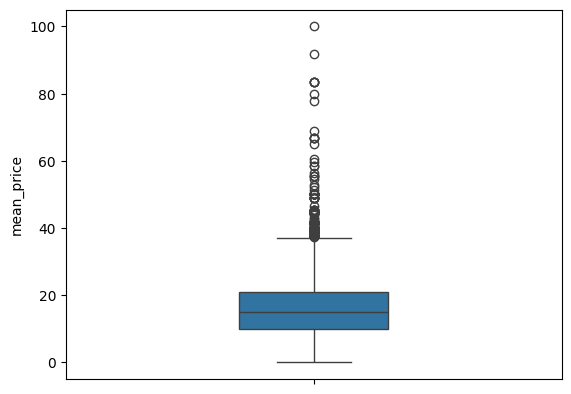

In [66]:
sns.boxplot(dfTrain['mean_price'], width=0.3)

In [67]:

feature = ['Unnamed: 0' , 'предмет' , 'ФИО' , 'tutor_head_tags' , 'tutor_rating' , 'tutor_reviews' , 'description' , 'experience_desc' , 'Education_1' , 'Desc_Education_1' , 'Education_2' , 'Desc_Education_2' , 'Education_3' , 'Desc_Education_3' , 'Education_4' , 'Desc_Education_4' , 'Ученая степень 1' , 'Ученое звание 1' , 'status' , 'experience' , 'Desc_Education_5' , 'Desc_Education_6' , 'Education_5' , 'Education_6' , 'Ученая степень 2' , 'Ученое звание 2' , 'categories']
target = ['mean_price']

X = dfTrain[feature]
y = dfTrain[target].values.ravel()

In [68]:
class TrigonometricFeaturesExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value="нет"):
        self.fill_value = fill_value
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
            # Заполняем пропуски указанным значением
            X_filled = X.fillna(self.fill_value)
            return X_filled

In [69]:

# числовые фичи
numeric_features = ["tutor_rating", "tutor_reviews"]

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median"))
    ]
)


# Категории где очень не мого категориальных данных и есле пустое знач
Features_extractor_features = ["Education_2", "Desc_Education_2", "Education_3", "Desc_Education_3", "Education_4",  "Desc_Education_4",  "Ученая степень 1", "Ученая степень 2"]

Features_extractor_transformer = Pipeline(
    steps=[
        ("features", TrigonometricFeaturesExtractor()),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# категориальные фичи
categorical_features = [
  'Unnamed: 0' , 'предмет' , 'ФИО' , 'tutor_head_tags' , 'description' , 'experience_desc' , 'Education_1' , 
  'Desc_Education_1' , 'status' , 'experience' , 'categories'
]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectKBest(score_func=f_regression, k="all")),
    ]
)


# для последующей предобработки фичей разного типа
preprocessor = ColumnTransformer(
    transformers=[
        ("setNot", Features_extractor_transformer, Features_extractor_features),
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        
    ]
)

In [70]:
# Разделение данных и обучение маделиы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
print(y_train.dtype)
# preprocessor.fit(X_train, y_train)

float64


In [71]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regression", None) 
    ]
)

# Сетки параметров для разных моделей
param_grids = [
    # Линейная регрессия (с регуляризацией)
    {
       'regression': [Ridge(random_state=42)],
       'regression__alpha': [0.01, 0.1, 1, 10, 100],
       'regression__max_iter': [100, 500, 1000],
    },
    
    # Random Forest (регрессия)
    {
       'regression': [RandomForestRegressor(random_state=42)],
       'regression__n_estimators': [50, 100, 200],
       'regression__max_depth': [None, 5, 10],
       'regression__min_samples_split': [2, 5, 10],
    },
    
    # SVM для регрессии (SVR)
    {
        'regression': [SVR()],
        'regression__C': [0.1, 1, 10],
        'regression__kernel': ['linear', 'rbf'],
        'regression__gamma': ['scale', 'auto'],
        'regression__epsilon': [0.1, 0.2],
    },
]

# Настройка GridSearchCV
grid_search = GridSearchCV(
    clf,
    param_grids,
    cv=3,
    scoring='neg_mean_squared_error',  #, 'r2'
    n_jobs=-1,
    error_score='raise',
)

grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка (F1):", grid_search.best_score_)

Лучшие параметры: {'regression': SVR(), 'regression__C': 1, 'regression__epsilon': 0.2, 'regression__gamma': 'scale', 'regression__kernel': 'linear'}
Лучшая оценка (F1): -82.30596780703227


In [75]:
# 2. Предсказание для тестового набора dfTest
y_test_pred = grid_search.predict(dfTest)
y_test_pred

result_df = pd.DataFrame({
    "id": range(len(y_test_pred)), 
    "mean_price": y_test_pred
})


result_df.to_csv("submission.csv", index=False)

print("Файл submission.csv успешно сохранен!")
result_df.head()

Файл submission.csv успешно сохранен!


,id,mean_price
0,0,14.294171
1,1,13.747108
2,2,17.154249
3,3,12.621372
4,4,8.790306


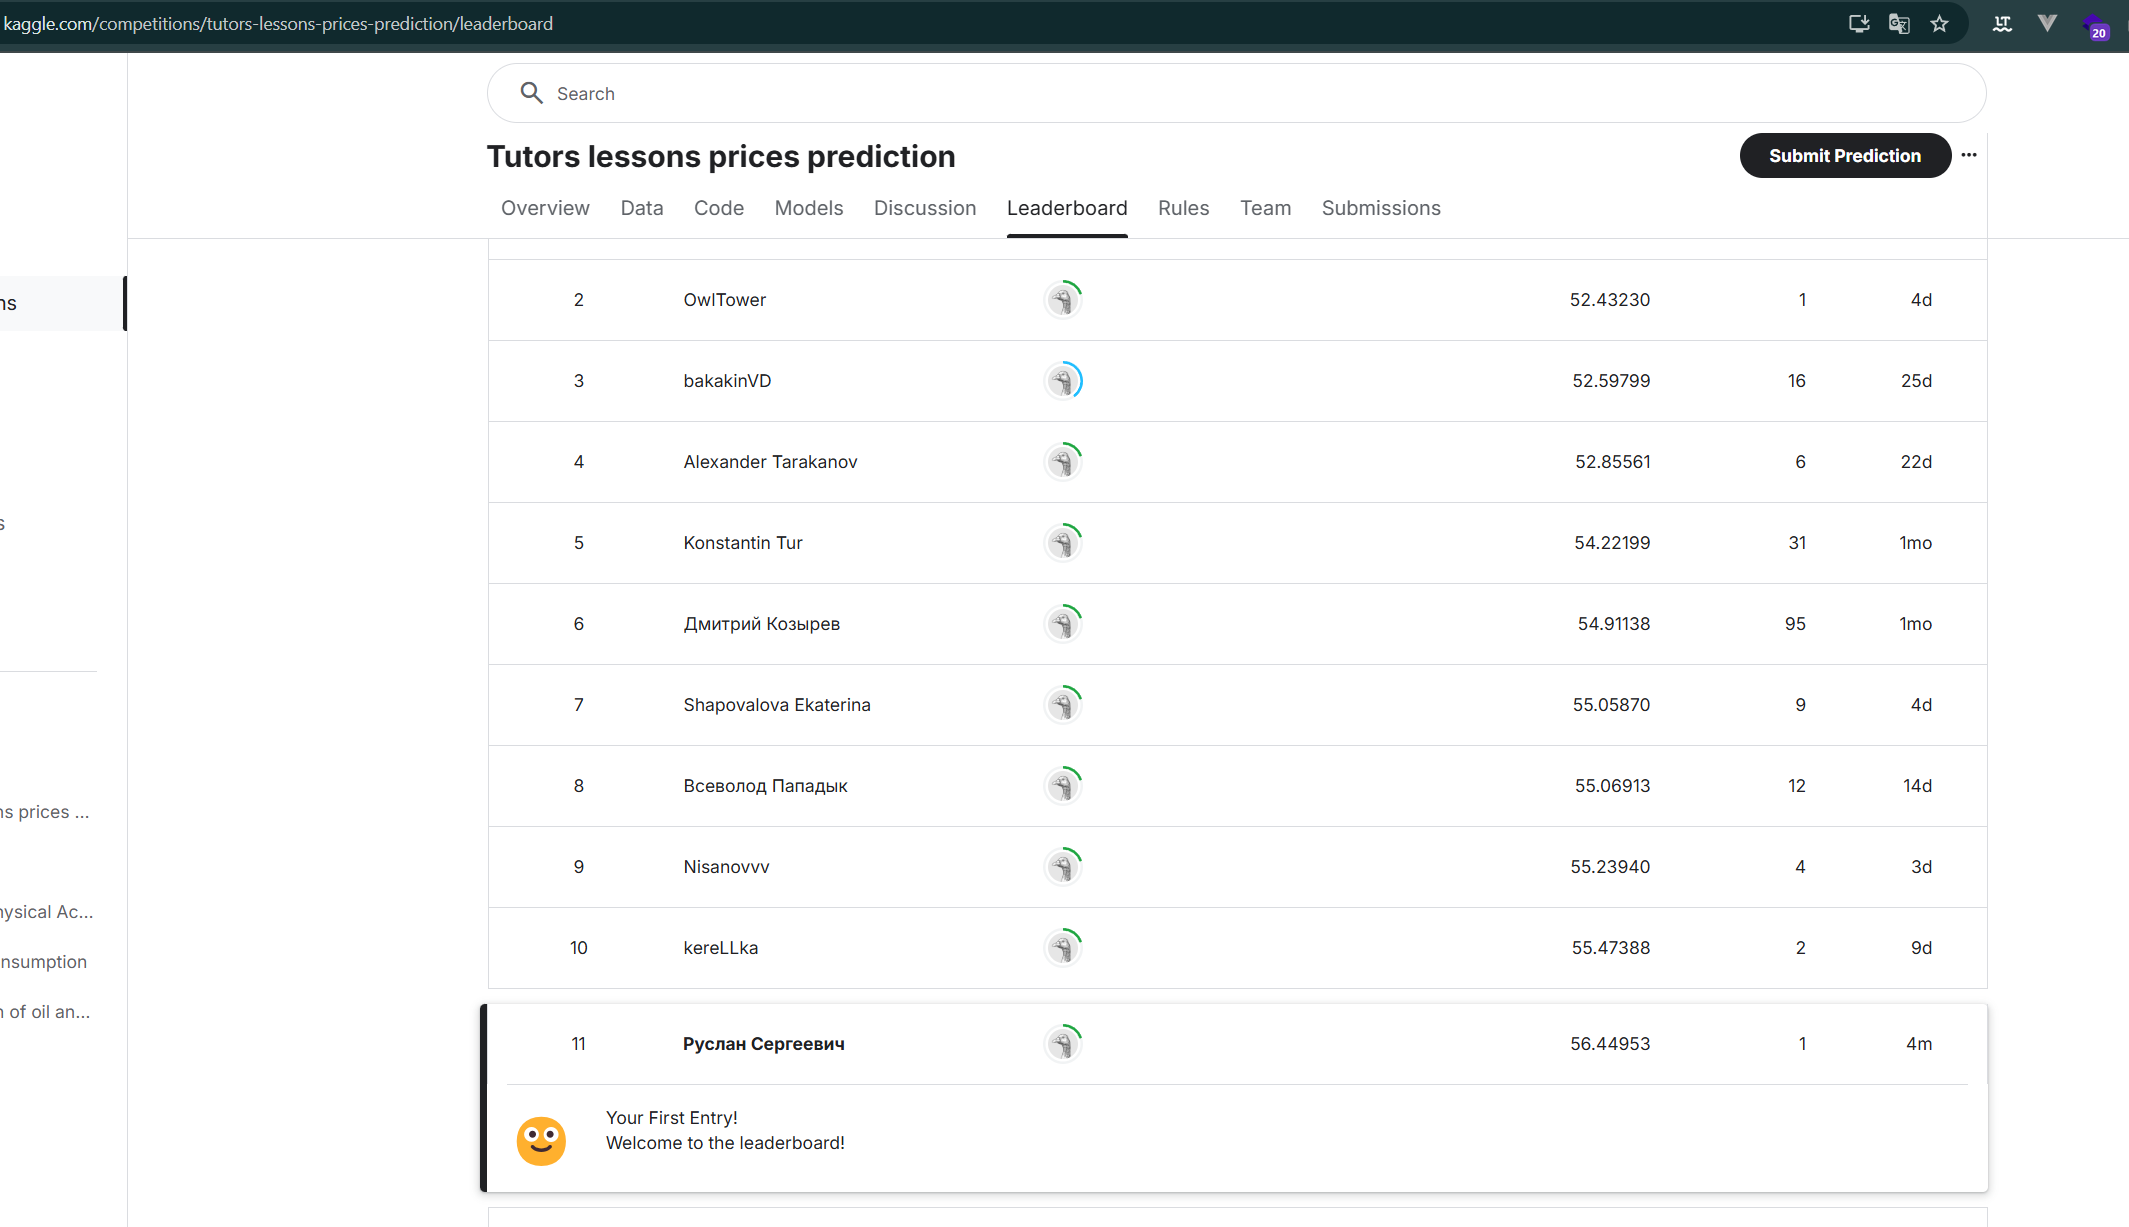